<a href="https://colab.research.google.com/github/Ayoub-Moutaouakil/GorzaIrizon/blob/main/ProjetPythonDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aujourd'hui, la plupart des vols dans le monde entier sont dirigés en pilote automatique. Une machine contrôle l'avion depuis le décollage jusqu'à l'atterrisage. Cependant l'humain prend la relève de la machine dans plusieurs cas :

- Perturbations météo
- Erreur du pilote automatique
- Probléme moteur
- etc...

Nos pilotes de ligne aujourd'hui sont formés à pouvoir réagir à tout type de situation. Malheureusement certains accidents sont toujours inévitables et provoquent des morts. On est donc ammener à se poser cette question :

### **Quels sont les facteurs d'un avion qu'il faut le plus améliorer pour éviter au mieux les accidents ?**

Pour cela nous allons analyser un dataset contenant des données sur les accidents aériens bréziliens, ce qui permettra de définir le probléme de construction des avions au Brézil. Nous pourrons donc aussi retranscrire ces données sur une globalité mondial.

---
Lecture des données
---
---

Importation et configuration des librairies

In [102]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as plt

pandas.set_option('display.max_columns', None)

Lecture des données contenant les informations des avions (date de construction, type de moteur, numéro d'identification, etc...)

In [81]:
aircrafts = pandas.read_csv('/content/aircrafts.csv', header=0, encoding='latin-1')
aircrafts = aircrafts.replace(numpy.nan, 0)
aircrafts.head()

,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1962.0,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,0.0,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1960.0,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,0.0,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,6.0,1966.0,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,0.0,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,6.0,1979.0,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,0.0,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,117.0,1975.0,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,0.0,2016-07-30


Lecture des données contenant les informations sur les accidents des avions bréziliens (type d'accident, endroit, mortalité, etc...)

In [82]:
occurrences = pandas.read_csv('/content/occurrences.csv', header=0, encoding='latin-1')
occurrences = occurrences.replace(numpy.nan, 0)
occurrences.head()

,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,0,0,0.0,0,0,1,0.0,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,0,1.0,2014-04-07,0,1,0.0,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,0,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,0,1.0,2012-09-20,4,1,0.0,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,0.0,0,0,1,0.0,2016-07-30


Les accidents sont représentés par deux types de catégories : 

In [83]:
print(occurrences['classification'].unique())

['ACCIDENT' 'SERIOUS INCIDENT']


Voyons voir le nombre d'accidents par type : 

In [84]:
print('Total: ' + str(occurrences['classification'].count()))

print('SERIOUS INCIDENT: ' + str(occurrences['classification'][occurrences['classification'] == 'SERIOUS INCIDENT'].count()))

print('ACCIDENT: ' + str(occurrences['classification'][occurrences['classification'] == 'ACCIDENT'].count()))

Total: 2027
SERIOUS INCIDENT: 552
ACCIDENT: 1475


Fusion des deux datasets

In [95]:
mergetable = aircrafts.join(occurrences, lsuffix="_left", rsuffix="_right")
mergetable = mergetable.replace(numpy.nan, 0)
mergetable = mergetable[(mergetable['classification'] != 0)]
mergetable.head()

,Unnamed: 0_left,aircraft_id,occurrence_id_left,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day_left,Unnamed: 0_right,occurrence_id_right,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day_right
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1962.0,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,0.0,2016-07-30,0.0,47965.0,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,0,0,0.0,0,0.0,1.0,0.0,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1960.0,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,0.0,2016-07-30,1.0,50313.0,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,0,1.0,2014-04-07,0.0,1.0,0.0,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,6.0,1966.0,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,0.0,2016-07-30,2.0,34078.0,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,0,1.0,2016-07-07,0.0,1.0,1.0,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,6.0,1979.0,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,0.0,2016-07-30,3.0,44988.0,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,0,1.0,2012-09-20,4.0,1.0,0.0,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,117.0,1975.0,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,0.0,2016-07-30,4.0,38855.0,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,0.0,0,0.0,1.0,0.0,2016-07-30


---
Analyse des données
---
---

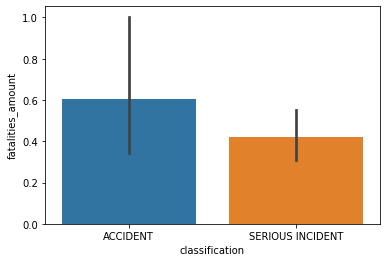

In [96]:
seaborn.barplot(data=mergetable, x='classification', y='fatalities_amount')

On remarque qu'il y'a plus de morts pour un accident normal qu'un accident sérieux.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

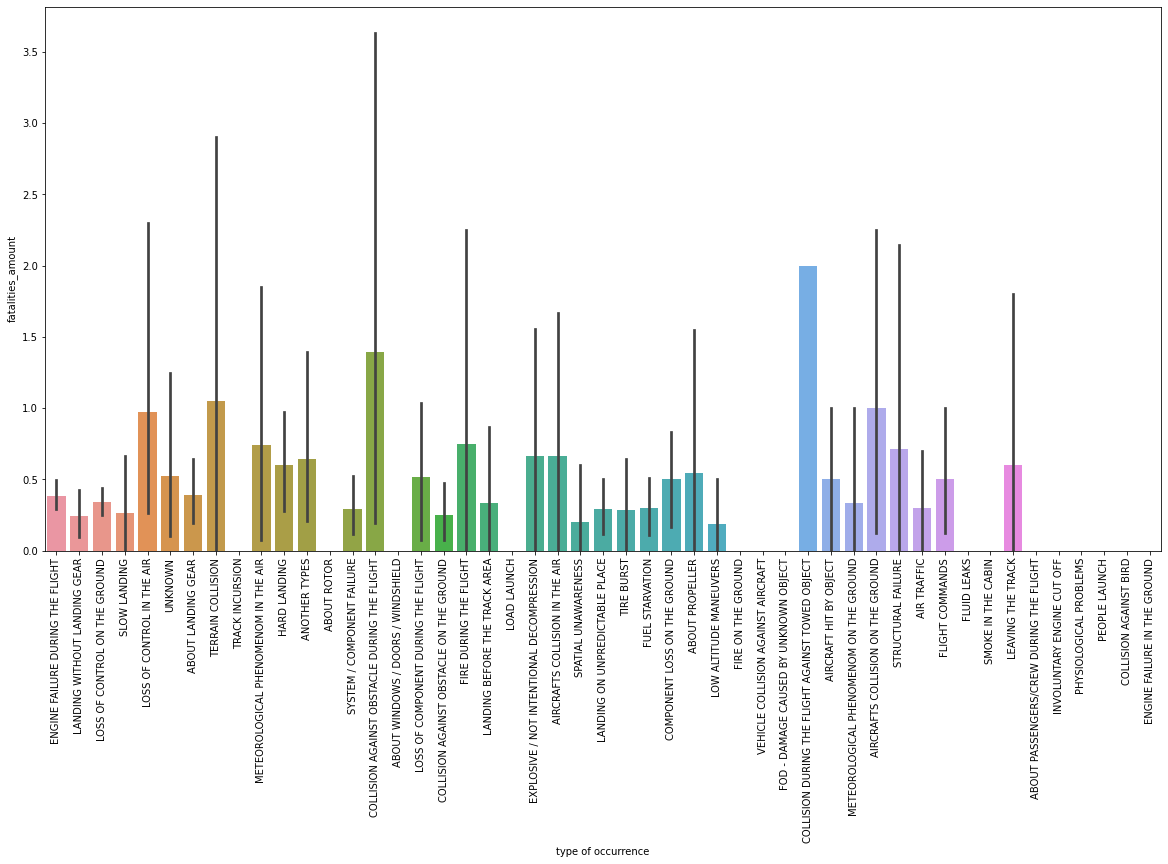

In [104]:
f, ax = plt.subplots(figsize = (20,10))
seaborn.barplot(data=mergetable, x='type of occurrence', y='fatalities_amount')
plt.xticks(rotation=90)

Cet histogramme nous indique le pourcentage de mort selon le type d'accident

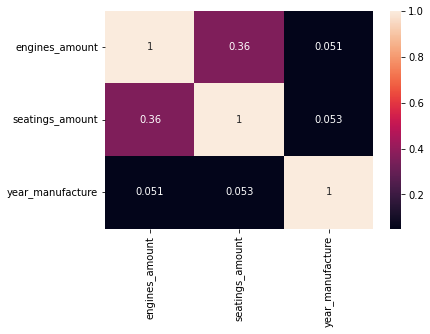

In [64]:
label_lst = ['damage_level',
             'engines_amount',
             'seatings_amount',
             'year_manufacture'
            ]

fig, axes = matplotlib.pyplot.subplots()
seaborn.heatmap(aircrafts[label_lst].corr(), annot=True)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.show()
matplotlib.pyplot.close()